In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_train = pd.read_csv('data/training.1600000.processed.noemoticon.csv',
                       encoding = "ISO-8859-1", engine='python',header=None,
                      names=['sentiment','tweet_id','date','flag','user','text'])

### Exploratory Data Analysis

Find the shape of dataset:

In [3]:
raw_train.shape

(1600000, 6)

#### Sentiment Column (Target)

In [4]:
raw_train['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

It appears that negative tweet is given a label of 0 and positive tweet is given a label of 4. For simplicity, I will convert the binary classification to [0,1].

In [5]:
def convert_sent(x):
    if x == 4:
        return 1
    else:
        return 0

In [6]:
raw_train['sentiment'] = raw_train['sentiment'].apply(convert_sent)

Text(0, 0.5, 'Frequency')

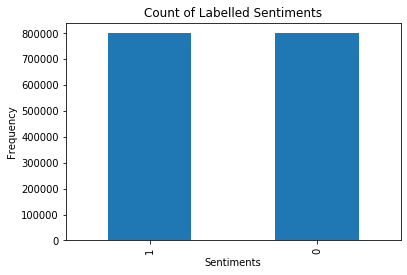

In [7]:
# Plotting the distribution for dataset.
ax = raw_train['sentiment'].value_counts().plot(kind='bar',
                                    title="Count of Labelled Sentiments")
ax.set_xlabel("Sentiments")
ax.set_ylabel("Frequency")

#### Tweet ID Column (Unique Identifier)
Hypothetically, the tweet id should be unique identifier of each tweet, so if we count the number of unique tweets, we should get back a value of 1600000.

In [8]:
len(raw_train['tweet_id'].unique())

1598315

But appearly that is not the case... Perhaps there are duplicated rows in the dataset:

In [9]:
id_count = raw_train['tweet_id'].value_counts()

In [10]:
# Looking at one of these duplicated id 1753678185  
pd.options.display.max_colwidth = 90
raw_train[raw_train['tweet_id'] == 1753678185]

,sentiment,tweet_id,date,flag,user,text
84766,0,1753678185,Sun May 10 02:51:55 PDT 2009,NO_QUERY,BoydyxO,sunnn finnalllyyy!! aint slept :| need some sleep
918539,1,1753678185,Sun May 10 02:51:55 PDT 2009,NO_QUERY,BoydyxO,sunnn finnalllyyy!! aint slept :| need some sleep


In [11]:
# Another duplicated id 1984377787
raw_train[raw_train['tweet_id'] == 1984377787]

,sentiment,tweet_id,date,flag,user,text
254974,0,1984377787,Sun May 31 14:59:31 PDT 2009,NO_QUERY,15AMR,I'm broke cuz she got all she wanted! Going hoe finally! AMR
1194019,1,1984377787,Sun May 31 14:59:31 PDT 2009,NO_QUERY,15AMR,I'm broke cuz she got all she wanted! Going hoe finally! AMR


It appears they are indeed duplicate rows, with different lables of sentiments! These tweet contents seem to have a satiricial or ironic tones, making it difficult to label them positive or negative. For this project, I have decided to remove these rows from the dataset.

In [12]:
# Find row indexes where the tweed id has exactly one entry
id_count[id_count.values == 1].index
train = raw_train[raw_train['tweet_id'].isin(id_count[id_count.values == 1].index)].reset_index(drop=True)
train.head()

,sentiment,tweet_id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David C..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't..."


In [13]:
# New shape
train.shape

(1596630, 6)

#### Date Column

In [14]:
train['date'].dtypes

dtype('O')

In [15]:
# Time Zone
area_code = train['date'].str[20:24]
area_code.value_counts()

PDT     1596630
Name: date, dtype: int64

It appears all of the time zones are recorded in Pacific Time.

In [16]:
# Year
year = train['date'].str[24:29]
year.value_counts()

2009    1596630
Name: date, dtype: int64

All of the tweets are from 2009.

Average sentiments by Months
date
Apr    0.584239
Jun    0.422159
May    0.610217
Name: sentiment, dtype: float64


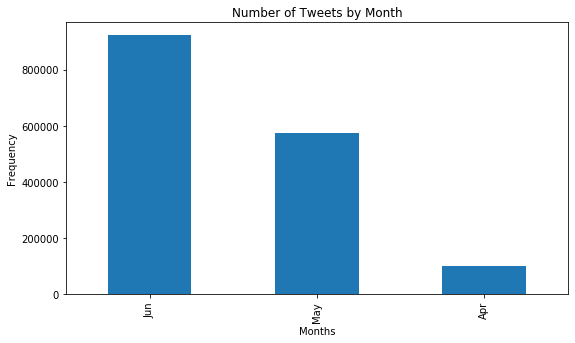

In [71]:
plt.figure(figsize=(9,5))
# Number of Tweets per Month
ax = train['date'].str[4:7].value_counts().plot(kind='bar',title="Number of Tweets by Month")
ax.set_xlabel("Months")
ax.set_ylabel("Frequency")

print("Average sentiments by Months")
print(train['sentiment'].groupby(train['date'].str[4:7]).mean())

Text(0, 0.5, 'Average Sentiment')

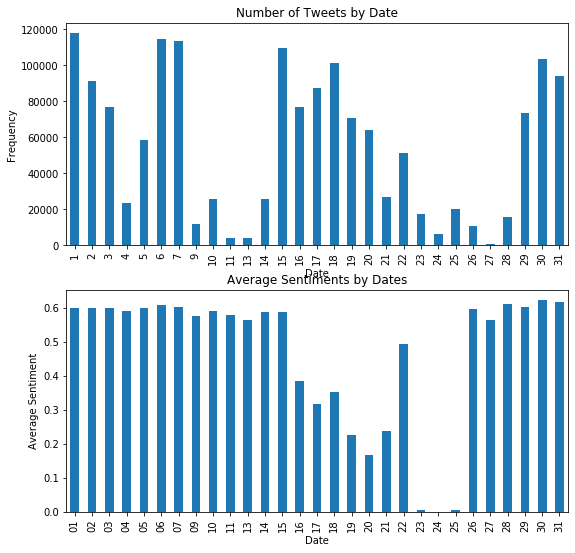

In [66]:
plt.subplots(2,1,sharex='col',figsize=(9,9))
# Number of Tweets per Days
plt.subplot(2,1,1)
ax = train['date'].str[8:10].astype(int).value_counts(sort=False).plot(kind='bar',title=f"Number of Tweets by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Frequency")

plt.subplot(2,1,2)
# Average Sentiments per Day
ax = train['sentiment'].groupby(train['date'].str[8:10]).mean().plot(kind='bar',title=f"Average Sentiments by Dates")
ax.set_xlabel("Date")
ax.set_ylabel("Average Sentiment")

Text(0, 0.5, 'Average Sentiment')

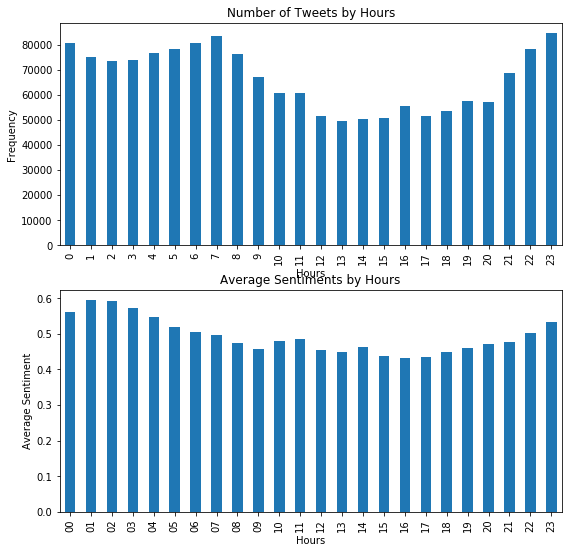

In [72]:
plt.subplots(2,1,sharex='col',figsize=(9,9))
# Number of Tweets per Hours
plt.subplot(2,1,1)
ax = train['date'].str[11:13].astype(int).value_counts(sort=False).plot(kind='bar',title=f"Number of Tweets by Hours")
ax.set_xlabel("Hours")
ax.set_ylabel("Frequency")

plt.subplot(2,1,2)
# Average Sentiments per Hour
ax = train['sentiment'].groupby(train['date'].str[11:13]).mean().plot(kind='bar',title=f"Average Sentiments by Hours")
ax.set_xlabel("Hours")
ax.set_ylabel("Average Sentiment")

Text(0, 0.5, 'Average Sentiment')

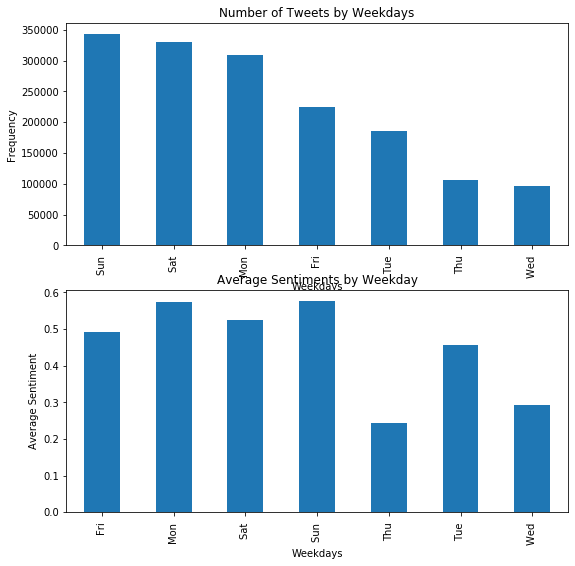

In [75]:
plt.subplots(2,1,sharex='col',figsize=(9,9))
# Number of Tweets per Weekday
plt.subplot(2,1,1)
ax = train['date'].str[0:4].value_counts().plot(kind='bar',title=f"Number of Tweets by Weekdays")
ax.set_xlabel("Weekdays")
ax.set_ylabel("Frequency")

plt.subplot(2,1,2)
# Average Sentiments per Day
ax = train['sentiment'].groupby(train['date'].str[0:4]).mean().plot(kind='bar',title=f"Average Sentiments by Weekday")
ax.set_xlabel("Weekdays")
ax.set_ylabel("Average Sentiment")

It appears that dates and weekdays may contribute to the Twitter sentiments in this specific dataset. However, considering the short span of period (3 months) the dataset covers, this difference captured may not be the best reflection in the actual relationship between date-time variables and sentiments. Hence, I will not include them into the model features.

In [87]:
train = train.drop(['date'],axis=1)

#### Flag Column

In [76]:
train['flag'].value_counts()

NO_QUERY    1596630
Name: flag, dtype: int64

It appears all of the rows contain the value of `NO_QUERY`, hence this column would not bring any information to our model, hence I will be removing it.

In [84]:
train = train.drop(['flag'],axis=1)

In [88]:
train.shape

(1596630, 4)

#### User Column

In [89]:
train['user'].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
xAkademiks           1
nickjantz            1
AerielleG            1
leightreed           1
XXXAimee             1
Name: user, Length: 659502, dtype: int64

We have 659,775 unique users in this dataset from 2009.

#### Text Column

In [98]:
train['text'].value_counts().head()

@ddlovato AJ RAFAEL (AWESOME MUSICIAN, FAMOUS ON YOUTUBE) COVERED YOUR SONG, DON'T FORGET. PLEASE WATCH IT  IT'S GOOD! http://bit.ly/vFWAs    19
rain rain go away                                                                                                                             19
my feet hurt                                                                                                                                  19
So bored                                                                                                                                      19
Its raining                                                                                                                                   19
Name: text, dtype: int64

Some rows seem to contain very specific contents, which made me suspect there might be more duplicated rows in the dataset. For instance, looking at the more repeated `isPlayer Has Died! Sorry ` text:

In [91]:
train[train['text'].str.contains('isPlayer Has Died! Sorry')]

,sentiment,tweet_id,user,text
99668,0,1793803394,wowlew,isPlayer Has Died! Sorry
99854,0,1793875823,wowlew,isPlayer Has Died! Sorry
99899,0,1793898439,wowlew,isPlayer Has Died! Sorry
99954,0,1793923840,wowlew,isPlayer Has Died! Sorry
101708,0,1794742412,wowlew,isPlayer Has Died! Sorry
...,...,...,...,...
352364,0,2032530352,wowlew,isPlayer Has Died! Sorry
359757,0,2046605443,wowlew,isPlayer Has Died! Sorry
360007,0,2046776094,wowlew,isPlayer Has Died! Sorry
360116,0,2046807093,wowlew,isPlayer Has Died! Sorry


All of these tweets come from the same user `wowlew`, who posted the same tweets multiple times daily from May 14 to June 4. This made me suspect that perhaps these tweets are computer generated contents that was reposted to the user's Twitter from games. Hence, I will be removing these rows from the dataset. This also made me suspect that there are more computer generated contents as such, and the easiest way to identify them, is the numebr of repetition. Hence, I will be removing texts appearing more than 20 times in the dataset:

In [96]:
train = train[train.groupby('text')['text'].transform('count') < 20].reset_index(drop=True)
train.shape

(1592831, 4)

Text(0, 0.5, 'Average Sentiment')

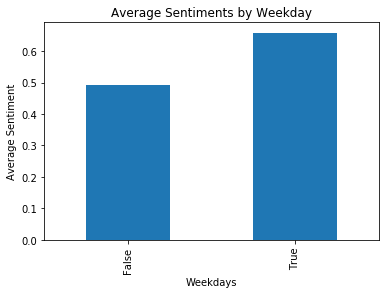

In [103]:
# Relationship between sentiments and URLs
ax = train['sentiment'].groupby(train['text'].str.contains('http://')).mean().plot(kind='bar',title=f"Average Sentiments by Presence of URLs")
ax.set_xlabel("Presence of URLs")
ax.set_ylabel("Average Sentiment")

Text(0, 0.5, 'Average Sentiment')

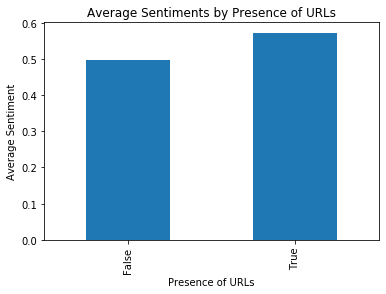

In [104]:
# Relationship between sentiments and Hashtags
ax = train['sentiment'].groupby(train['text'].str.contains('#')).mean().plot(kind='bar',title=f"Average Sentiments by Presence of Hashtags")
ax.set_xlabel("Presence of Hastags")
ax.set_ylabel("Average Sentiment")

Text(0, 0.5, 'Average Sentiment')

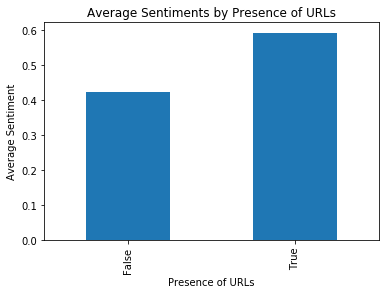

In [105]:
# Find text columns with urls
ax = train['sentiment'].groupby(train['text'].str.contains('@')).mean().plot(kind='bar',title=f"Average Sentiments by Presence of Mentions")
ax.set_xlabel("Presence of Mentions")
ax.set_ylabel("Average Sentiment")

In [106]:
# Final train dataset shape
train.shape

(1592831, 4)